### Module section

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf 
from tensorflow import keras 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB



### Load the dataset 

In [2]:
df= pd.read_csv("C:/Users/elias/Desktop/Heart_failure/heart_failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### There are some steps in a data science project that need to be followed. The following steps we will follow in our work:

1. Data Cleaning & Pre processing 
2. Exploratory Data Analysis (EDA) 
3. Predictive Machine Learning Model Building 
4. Cross Validation & Hyperparameters optimization

### 1. Data Preprocessing 

In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### NB: We don't have any missing value. The data has already been cleared

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 2. Exploratory Data Analysis (EDA)

#### EDA 1:Visualize total SEX through Countplot 

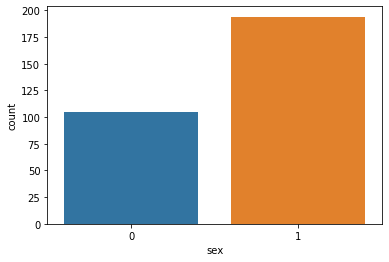

In [5]:
plot = sns.countplot(df["sex"])

#### EDA 2: How many individuals have diabetes through smoking

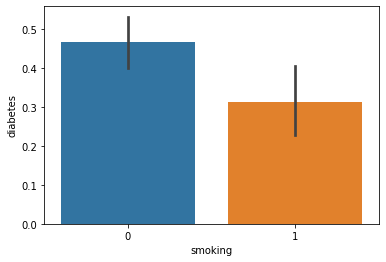

In [6]:
plot = sns.barplot(x=df["smoking"], 
                   y=df["diabetes"])

#### EDA 3: How many Death Event based on the Smoking 

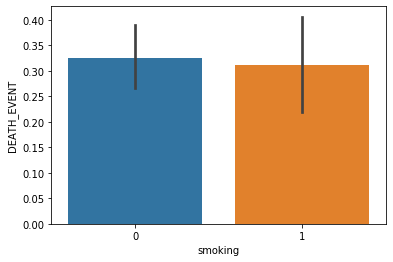

In [7]:
 plot = sns.barplot(x=df["smoking"], 
                   y=df["DEATH_EVENT"])

#### EDA 4: How many Death Event based on diabetes

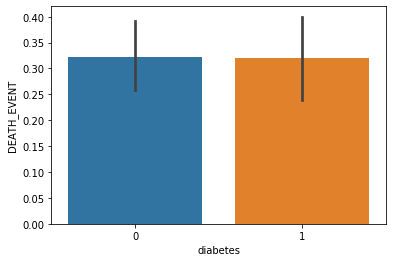

In [8]:
plot = sns.barplot(x=df["diabetes"], 
                   y=df["DEATH_EVENT"])

#### EDA 5: Individuals age infected with diabetes 

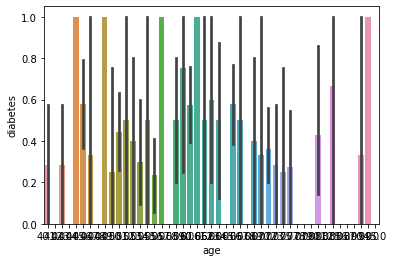

In [9]:
plot = sns.barplot(x=df["age"], 
                   y=df["diabetes"])

#### EDA 6: Heart failure based on the High Blood Pressure 

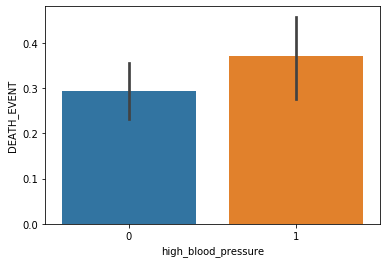

In [10]:
plot = sns.barplot(x=df["high_blood_pressure"], 
                   y=df["DEATH_EVENT"])

#### EDA 7: Heart failure based on the anaemia

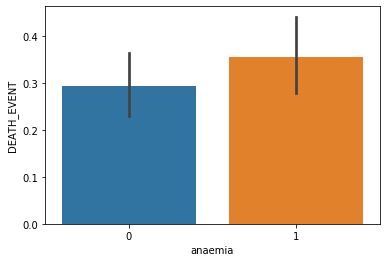

In [12]:
plot = sns.barplot(x=df["anaemia"], 
                   y=df["DEATH_EVENT"])

#### EDA 8: Visualize the Heart high_blood_pressure based on the serum_sodium

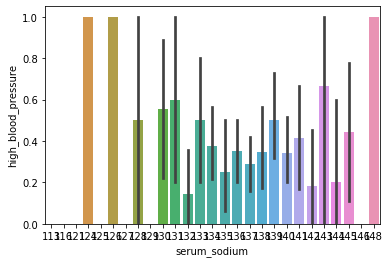

In [13]:
plot = sns.barplot(x=df["serum_sodium"], 
                   y=df["high_blood_pressure"])

#### EDA 9: #Let's see the Death Event based on the ejection fraction

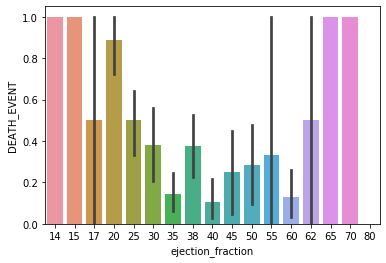

In [14]:
plot = sns.barplot(x=df["ejection_fraction"], 
                   y=df["DEATH_EVENT"])

#### EDA 10: Let's find out the outlier in our dataset 

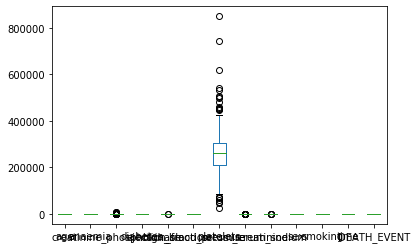

In [15]:
df.plot(kind='box')
plt.show()

#### NB: We have some outlier which we can observed in the box plot 

In [16]:
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


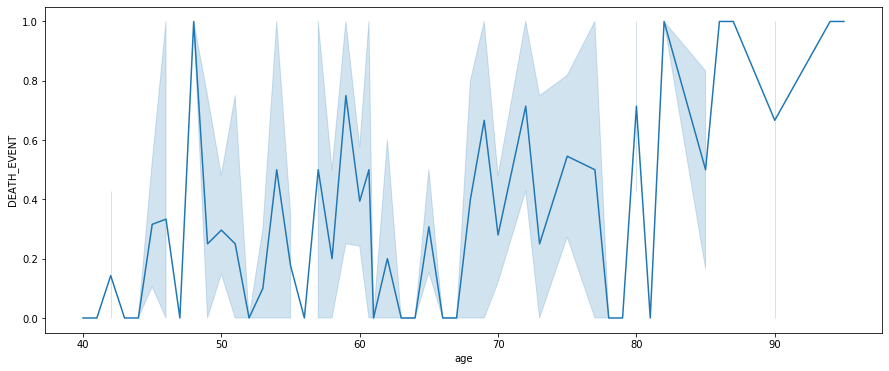

In [17]:
plt.figure(figsize=(15,6))

plot = sns.lineplot(x=df["age"],
                    y=df["DEATH_EVENT"])

#### EDA 11: Find out the outlier for each

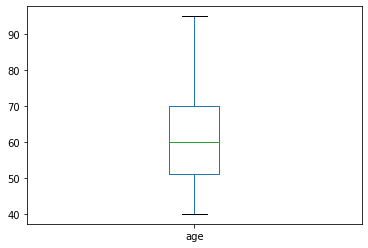

In [18]:
df['age'].plot(kind='box')
plt.show()

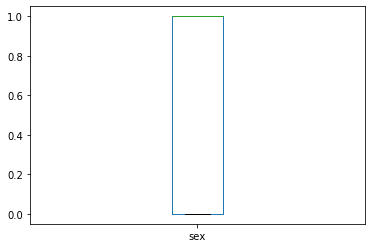

In [19]:
df['sex'].plot(kind='box')
plt.show()

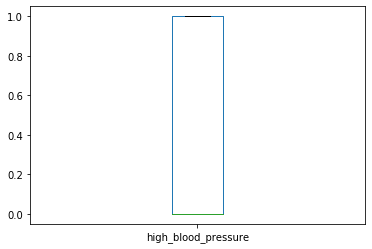

In [20]:
df['high_blood_pressure'].plot(kind='box')
plt.show()

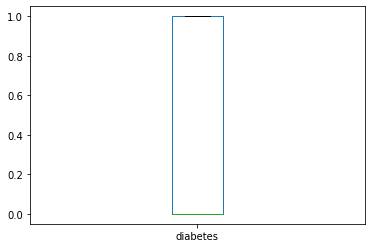

In [21]:
df['diabetes'].plot(kind='box')
plt.show()

#### EDA 12: Let's find out the Normal Distribution for each variable 

In probability theory, a normal distribution is a type of continuous probability distribution for a real-valued random variable

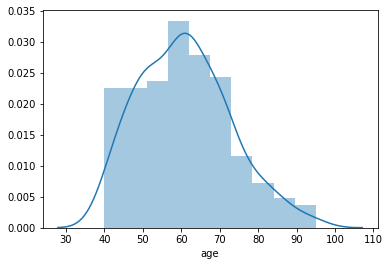

In [22]:
plot = sns.distplot(df["age"],
                    hist=True)

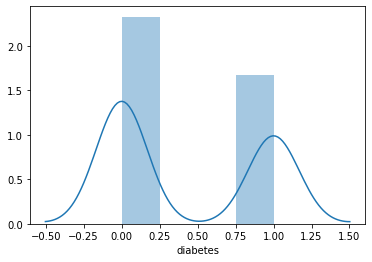

In [23]:
plot = sns.distplot(df["diabetes"],
                    hist=True)

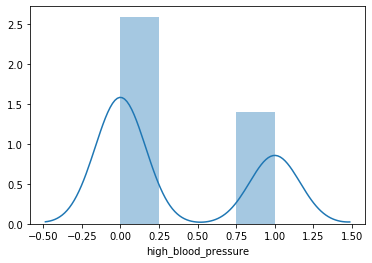

In [24]:
plot = sns.distplot(df["high_blood_pressure"],
                    hist=True)

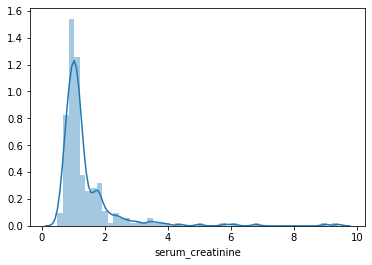

In [25]:
plot = sns.distplot(df["serum_creatinine"],
                    hist=True)

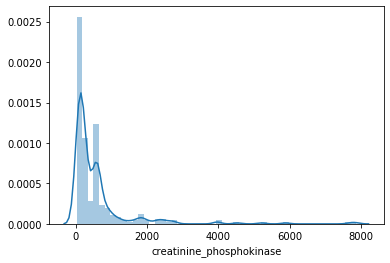

In [26]:
plot = sns.distplot(df["creatinine_phosphokinase"],
                    hist=True)

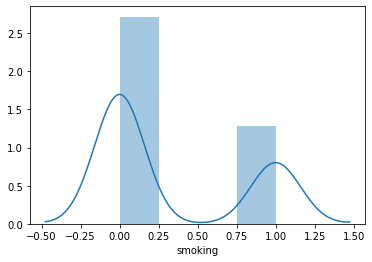

In [27]:
plot = sns.distplot(df["smoking"],
                    hist=True)

### 3. Machine Learning Model 

#### Define the input and target features 

In [28]:
model_input= df.drop('DEATH_EVENT', axis='columns')
model_target= df['DEATH_EVENT']


#### Train Test Split 

In [29]:
X_train, X_test, y_train, y_test= train_test_split(model_input, model_target, test_size=0.2, random_state=4)

#### Apply Logistic Regression Algorithm 

In [30]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Users\elias\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Calculate Model Score 

In [31]:
logistic_regression.score(X_test, y_test)

0.8333333333333334

#### Classificaton Report 

In [32]:
print('Coefficients:', logistic_regression.coef_)
print('Intercept:', logistic_regression.intercept_)
 
predictions = logistic_regression.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 3.31822636e-02  2.23450898e-04  2.08112680e-04  4.57293282e-04
  -3.98584997e-02 -1.15807590e-04 -1.33442349e-06  5.19636162e-03
   8.38241220e-03  1.83237320e-04 -5.09356461e-05 -1.98553669e-02]]
Intercept: [0.0001697]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.72      0.72      0.72        18

    accuracy                           0.83        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.83      0.83      0.83        60

Confusion Matrix:
 [[37  5]
 [ 5 13]]
Accuracy Score: 0.8333333333333334
Precision: 0.7222222222222222
Recall: 0.7222222222222222


#### NB: We can clearly see that our model predict 83% accurately. 

#### Visualize the Confusion Matrix 

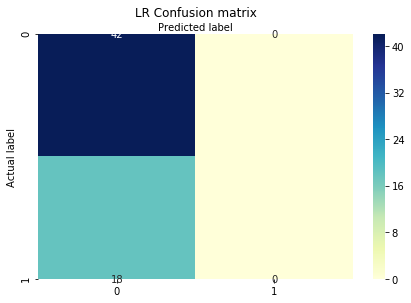

In [53]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('LR Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### ROC-AUC Curve 

Another way to determine how good the performance of different classification models is the ROC-AUC curve. ROC stands for Receiver Operating Curve and AUC stands for Area Under Curve. The blue line in the picture below is ROC, and the space below this ROC is AUC. The higher the value of ROC i.e. the closer the blue line goes to the top (1), the better our model is.

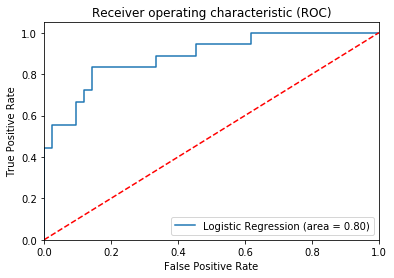

In [34]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Let's predict

In [35]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [36]:
new_observation = [[75.0, 0, 583, 1, 21, 1,265000.00,1.8,129,0,1,5]]
logistic_regression.predict(new_observation)

array([1], dtype=int64)

Here our observation predicts array([1] which means is the patient heart could be failed.

#### Apply DecisionTree Classifier 

In [37]:
decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Classification Report of DecisionTree

In [38]:
#print('Coefficients:', decision_tree.coef_)
#print('Intercept:', decision_tree.intercept_)
 
predictions = decision_tree.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.62      0.56      0.59        18

    accuracy                           0.77        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.76      0.77      0.76        60

Confusion Matrix:
 [[36  6]
 [ 8 10]]
Accuracy Score: 0.7666666666666667
Precision: 0.625
Recall: 0.5555555555555556


#### ROC-AUC Curve for DecisionTree Classifier 

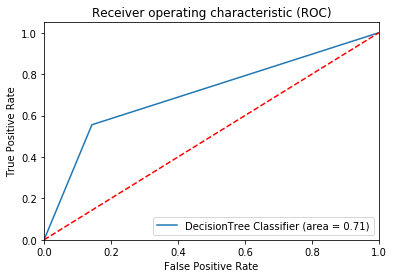

In [39]:
decision_roc_auc = roc_auc_score(y_test, decision_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTree Classifier (area = %0.2f)' % decision_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Dec_ROC')
plt.show()

#### Apply RandomForestClassifier

In [40]:
random_forest= RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Classification Report 

In [41]:
#print('Coefficients:', random_forest.coef_)
#print('Intercept:', random_forest.intercept_)
 
predictions = random_forest.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        42
           1       0.75      0.50      0.60        18

    accuracy                           0.80        60
   macro avg       0.78      0.71      0.73        60
weighted avg       0.79      0.80      0.79        60

Confusion Matrix:
 [[39  3]
 [ 9  9]]
Accuracy Score: 0.8
Precision: 0.75
Recall: 0.5


#### ROC-AUC Curve for RandomForest Classifier  

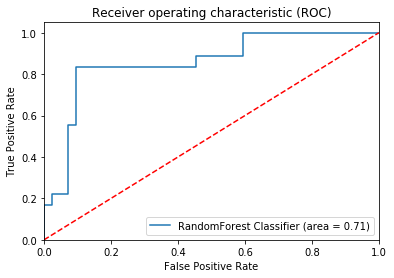

In [42]:
ranfor_roc_auc = roc_auc_score(y_test, decision_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier (area = %0.2f)' % ranfor_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Ranfor_ROC')
plt.show()

#### Apply Support Vector Machine (SVM)

In [43]:
support_vector= svm.SVC(kernel='rbf')
support_vector.fit(X_train, y_train)

C:\Users\elias\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Classification Matrix

In [45]:
pred=support_vector.predict(X_test)
print(classification_report(y_test, pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        42
           1       0.00      0.00      0.00        18

    accuracy                           0.70        60
   macro avg       0.35      0.50      0.41        60
weighted avg       0.49      0.70      0.58        60


Accuracy: 0.7000
[[42  0]
 [18  0]]


C:\Users\elias\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Visualize the SVM Confusion Matrix 

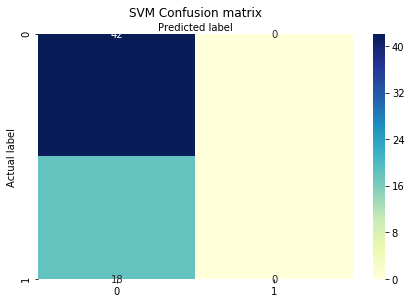

In [52]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Apply Naive Bayes Algorithm 

In [58]:
naive_bayes= GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Classification Matrix for Naive bayes (BernoulliNB)

In [59]:
naive_pred=naive_bayes.predict(X_test)
print(classification_report(y_test, naive_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, naive_pred)))
print(confusion_matrix(y_test,naive_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        42
           1       0.80      0.44      0.57        18

    accuracy                           0.80        60
   macro avg       0.80      0.70      0.72        60
weighted avg       0.80      0.80      0.78        60


Accuracy: 0.8000
[[40  2]
 [10  8]]


#### Confusion Matrix for the Naive Bayes

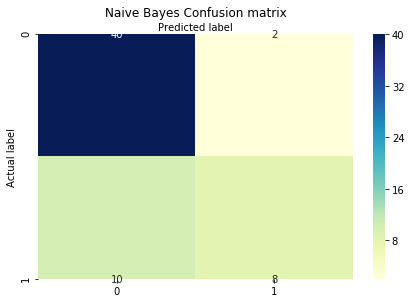

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, naive_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### ROC-AUC Curve for Naive Bayes

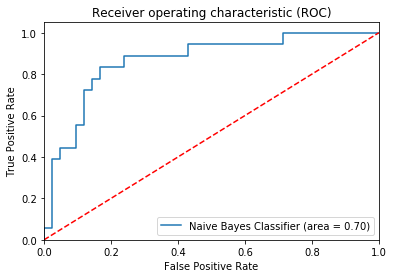

In [61]:
naive_roc_auc = roc_auc_score(y_test, naive_bayes.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Classifier (area = %0.2f)' % naive_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Ranfor_ROC')
plt.show()

#### Apply Adaptive Boosting Algorithm 

In [62]:
adaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
adaModel.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=150, random_state=None)

#### Classification Report 

In [63]:
ada_pred=adaModel.predict(X_test)
print(classification_report(y_test, ada_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print(confusion_matrix(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.64      0.78      0.70        18

    accuracy                           0.80        60
   macro avg       0.77      0.79      0.78        60
weighted avg       0.82      0.80      0.81        60


Accuracy: 0.8000
[[34  8]
 [ 4 14]]


#### Feature Importance 

Another important function of Boosting is 'Feature Importance', this function allows you to know which feature variables are more important for the model. In this method, it is calculated which feature is used to reduce the impurity and those features are given more importance.

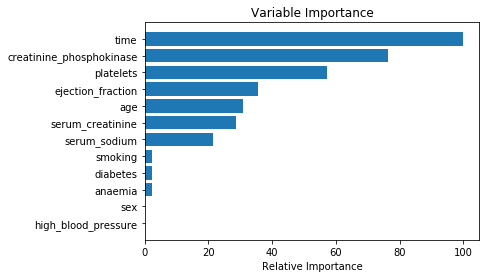

In [65]:
feature_importance = adaModel.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,model_input.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Apply Artificial Neural Network

In [87]:
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1, input_shape=[12], activation='linear')
])

### Compile the Artificial Neural Network Model

In [88]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
             metrics=['accuracy'])

In [89]:
model.fit(X_train, y_train, epochs=500)

Train on 239 samples
Epoch 1/500
239/239 [==============================] - 0s 2ms/sample - loss: nan - accuracy: 0.4895       
Epoch 2/500
239/239 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.6736
Epoch 3/500
239/239 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.6736
Epoch 4/500
239/239 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.6736
Epoch 5/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 6/500
239/239 [==============================] - 0s 58us/sample - loss: nan - accuracy: 0.6736
Epoch 7/500
239/239 [==============================] - 0s 58us/sample - loss: nan - accuracy: 0.6736
Epoch 8/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 9/500
239/239 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.6736
Epoch 10/500
239/239 [==============================] - 0s 58us/

Epoch 81/500
239/239 [==============================] - 0s 67us/sample - loss: nan - accuracy: 0.6736
Epoch 82/500
239/239 [==============================] - 0s 88us/sample - loss: nan - accuracy: 0.6736
Epoch 83/500
239/239 [==============================] - 0s 75us/sample - loss: nan - accuracy: 0.6736
Epoch 84/500
239/239 [==============================] - 0s 71us/sample - loss: nan - accuracy: 0.6736
Epoch 85/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 86/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 87/500
239/239 [==============================] - 0s 104us/sample - loss: nan - accuracy: 0.6736
Epoch 88/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 89/500
239/239 [==============================] - 0s 100us/sample - loss: nan - accuracy: 0.6736
Epoch 90/500
239/239 [==============================] - 0s 88us/sample - loss: n

239/239 [==============================] - 0s 83us/sample - loss: nan - accuracy: 0.6736
Epoch 161/500
239/239 [==============================] - 0s 63us/sample - loss: nan - accuracy: 0.6736
Epoch 162/500
239/239 [==============================] - 0s 79us/sample - loss: nan - accuracy: 0.6736
Epoch 163/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 164/500
239/239 [==============================] - 0s 79us/sample - loss: nan - accuracy: 0.6736
Epoch 165/500
239/239 [==============================] - 0s 71us/sample - loss: nan - accuracy: 0.6736
Epoch 166/500
239/239 [==============================] - 0s 88us/sample - loss: nan - accuracy: 0.6736
Epoch 167/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 168/500
239/239 [==============================] - 0s 79us/sample - loss: nan - accuracy: 0.6736
Epoch 169/500
239/239 [==============================] - 0s 92us/sample - loss: nan - a

239/239 [==============================] - 0s 75us/sample - loss: nan - accuracy: 0.6736
Epoch 240/500
239/239 [==============================] - 0s 67us/sample - loss: nan - accuracy: 0.6736
Epoch 241/500
239/239 [==============================] - 0s 75us/sample - loss: nan - accuracy: 0.6736
Epoch 242/500
239/239 [==============================] - 0s 83us/sample - loss: nan - accuracy: 0.6736
Epoch 243/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 244/500
239/239 [==============================] - 0s 100us/sample - loss: nan - accuracy: 0.6736
Epoch 245/500
239/239 [==============================] - 0s 88us/sample - loss: nan - accuracy: 0.6736
Epoch 246/500
239/239 [==============================] - 0s 104us/sample - loss: nan - accuracy: 0.6736
Epoch 247/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 248/500
239/239 [==============================] - 0s 108us/sample - loss: nan 

239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 319/500
239/239 [==============================] - 0s 67us/sample - loss: nan - accuracy: 0.6736
Epoch 320/500
239/239 [==============================] - 0s 88us/sample - loss: nan - accuracy: 0.6736
Epoch 321/500
239/239 [==============================] - 0s 63us/sample - loss: nan - accuracy: 0.6736
Epoch 322/500
239/239 [==============================] - 0s 83us/sample - loss: nan - accuracy: 0.6736
Epoch 323/500
239/239 [==============================] - 0s 104us/sample - loss: nan - accuracy: 0.6736
Epoch 324/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 325/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 326/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 327/500
239/239 [==============================] - 0s 96us/sample - loss: nan - 

239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 398/500
239/239 [==============================] - 0s 88us/sample - loss: nan - accuracy: 0.6736
Epoch 399/500
239/239 [==============================] - 0s 67us/sample - loss: nan - accuracy: 0.6736
Epoch 400/500
239/239 [==============================] - 0s 75us/sample - loss: nan - accuracy: 0.6736
Epoch 401/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 402/500
239/239 [==============================] - 0s 83us/sample - loss: nan - accuracy: 0.6736
Epoch 403/500
239/239 [==============================] - 0s 96us/sample - loss: nan - accuracy: 0.6736
Epoch 404/500
239/239 [==============================] - 0s 100us/sample - loss: nan - accuracy: 0.6736
Epoch 405/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 406/500
239/239 [==============================] - 0s 92us/sample - loss: nan - 

239/239 [==============================] - 0s 67us/sample - loss: nan - accuracy: 0.6736
Epoch 477/500
239/239 [==============================] - 0s 75us/sample - loss: nan - accuracy: 0.6736
Epoch 478/500
239/239 [==============================] - 0s 88us/sample - loss: nan - accuracy: 0.6736
Epoch 479/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 480/500
239/239 [==============================] - 0s 67us/sample - loss: nan - accuracy: 0.6736
Epoch 481/500
239/239 [==============================] - 0s 83us/sample - loss: nan - accuracy: 0.6736
Epoch 482/500
239/239 [==============================] - 0s 75us/sample - loss: nan - accuracy: 0.6736
Epoch 483/500
239/239 [==============================] - 0s 92us/sample - loss: nan - accuracy: 0.6736
Epoch 484/500
239/239 [==============================] - 0s 71us/sample - loss: nan - accuracy: 0.6736
Epoch 485/500
239/239 [==============================] - 0s 88us/sample - loss: nan - a

### Evaluate the model loss and accuracy

In [90]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

60/60 - 0s - loss: nan - accuracy: 0.7000
